# GRAPHs
### Evaluation
```bash
python eval_qa.py --dir <path_to_saved_checkpoints>

- For LLMs based on non-parametric memory, the cached evaluation scripts and results are included in ```LLM.ipynb```.

**eval_qa.py:** This script is listed as an evaluation script for the trained model. Since the graphs show accuracy across optimization steps, the plotting logic could be part of this evaluation script. Look here for matplotlib or seaborn code that might generate accuracy plots.

In [24]:
import sys
import matplotlib.pyplot as plt
from eval_qa import eval_file
import argparse
import pandas as pd
import torch
import json
torch.cuda.empty_cache()

## Accuracy Graphs

Insert path where the model is saved (= outputfile) 

Will insert 2 path for comparing 2 models at a time!

**/scratch/davide/model_paper**  new directory scratch!


In [106]:
#path where saftenesors checkpoints are saved 


#/scratch/davide/model_paper

#path_input_0 = "/home/s220331/GROK/Thesis/outputs_ex_0/"
path_input_0 =  "/scratch/davide/model_paper/outputs_data_real_test_0_4gpu/"  # on  complete dataset

#path_input_1 = "/scratch/davide/model_paper/outputs_multy/" #first model multy on ex_small dataset
path_input_1  = "/scratch/davide/model_paper/outputs_small_4gpu/"

In [94]:
"""# Just to check if the one and multy gpu file works the same 
multy= "/scratch/davide/model_paper/outputs_multy/checkpoint-1000/all_items.json"
one= "/home/s220331/GROK/Thesis/outputs_ex_0/checkpoint-1000/all_items.json"

with open(multy, "r") as read_file:
    multy_d = json.load(read_file)

with open(one , "r") as read_file:
    one_d = json.load(read_file)

print("all_items_json len multy gpu :",len(multy_d), "\n")
print("all_items_json len multy gpu :",len(one_d))"""

'# Just to check if the one and multy gpu file works the same \nmulty= "/scratch/davide/model_paper/outputs_multy/checkpoint-1000/all_items.json"\none= "/home/s220331/GROK/Thesis/outputs_ex_0/checkpoint-1000/all_items.json"\n\nwith open(multy, "r") as read_file:\n    multy_d = json.load(read_file)\n\nwith open(one , "r") as read_file:\n    one_d = json.load(read_file)\n\nprint("all_items_json len multy gpu :",len(multy_d), "\n")\nprint("all_items_json len multy gpu :",len(one_d))'

**Model 0:**

In [95]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_input_0, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_0 = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_0:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    print(folder_name, "|", res)
    continue

100%|██████████| 13/13 [00:00<00:00, 21.20it/s]

checkpoint-2000 | id_atomic: 0.002; ood_atomic: 0.001; train_inferred: 0.003; test_inferred_iid: 0.003; test_inferred_ood: 0.002
checkpoint-4000 | id_atomic: 0.007; ood_atomic: 0.0; train_inferred: 0.009; test_inferred_iid: 0.008; test_inferred_ood: 0.0
checkpoint-5000 | id_atomic: 0.008; ood_atomic: 0.001; train_inferred: 0.01; test_inferred_iid: 0.009; test_inferred_ood: 0.0
checkpoint-10000 | id_atomic: 0.006; ood_atomic: 0.001; train_inferred: 0.011; test_inferred_iid: 0.008; test_inferred_ood: 0.0
checkpoint-15000 | id_atomic: 0.009; ood_atomic: 0.001; train_inferred: 0.013; test_inferred_iid: 0.008; test_inferred_ood: 0.0
checkpoint-20000 | id_atomic: 0.012; ood_atomic: 0.001; train_inferred: 0.016; test_inferred_iid: 0.007; test_inferred_ood: 0.001
checkpoint-25000 | id_atomic: 0.02; ood_atomic: 0.001; train_inferred: 0.027; test_inferred_iid: 0.009; test_inferred_ood: 0.001
checkpoint-30000 | id_atomic: 0.058; ood_atomic: 0.0; train_inferred: 0.048; test_inferred_iid: 0.01; tes

**Model 1:**

In [96]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_input_1, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_1 = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_1:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    print(folder_name, "|", res)
    #continue

100%|██████████| 13/13 [00:00<00:00, 276.00it/s]

checkpoint-2000 | id_atomic: 0.02; ood_atomic: 0.005; train_inferred: 0.03; test_inferred_iid: 0.027; test_inferred_ood: 0.0
checkpoint-4000 | id_atomic: 0.087; ood_atomic: 0.005; train_inferred: 0.06; test_inferred_iid: 0.033; test_inferred_ood: 0.004
checkpoint-5000 | id_atomic: 0.113; ood_atomic: 0.02; train_inferred: 0.07; test_inferred_iid: 0.013; test_inferred_ood: 0.0
checkpoint-10000 | id_atomic: 0.99; ood_atomic: 0.19; train_inferred: 0.97; test_inferred_iid: 0.927; test_inferred_ood: 0.008
checkpoint-15000 | id_atomic: 0.997; ood_atomic: 0.86; train_inferred: 1.0; test_inferred_iid: 0.983; test_inferred_ood: 0.0
checkpoint-20000 | id_atomic: 0.997; ood_atomic: 0.865; train_inferred: 0.997; test_inferred_iid: 1.0; test_inferred_ood: 0.0
checkpoint-25000 | id_atomic: 1.0; ood_atomic: 0.89; train_inferred: 1.0; test_inferred_iid: 0.997; test_inferred_ood: 0.004
checkpoint-30000 | id_atomic: 1.0; ood_atomic: 0.93; train_inferred: 1.0; test_inferred_iid: 0.987; test_inferred_ood: 

Create the Accuarcy Graphs:

In [139]:
# Data loaded from the previous step

def Acc_graph(data = scores_dict_normal_0, data_sharing = scores_dict_normal_1, title_1= 'Model Accuracy over Optimization Steps (Normal)',title_2= 'Model Accuracy over Optimization Steps (Sharing)' ):
    
    optimization_steps = [int(checkpoint.split('-')[1]) for checkpoint, _ in data]
    train_id = [dict(results)['train_inferred'] for _, results in data]   #inferred train-> iid as no train on ood obviously!
    test_id = [dict(results)['test_inferred_iid'] for _, results in data]
    test_ood = [dict(results)['test_inferred_ood'] for _, results in data]

    # Sample Data (replace these with your actual data)

    # Create the figure and axis objects
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    # title figure
    fig.suptitle('Accuracy Composition', fontsize=13, fontweight='bold' )

    # First graph
    axs[0].plot(optimization_steps, train_id, 'o-', label='Train (ID)', color='r')
    axs[0].plot(optimization_steps, test_id, 's-', label='Test (ID)', color='g')
    axs[0].plot(optimization_steps, test_ood, '^-', label='Test (OOD)', color='b')
    axs[0].set_xscale('log')  # Set X-axis to log scale
    axs[0].set_xlabel('Optimization Step (Log Scale)')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()
    axs[0].grid(True)  # Enable grid lines for the first graph
    # title
    axs[0].set_title(title_1, fontsize=13)

    # Second graph (adjusting accuracy curves for the second graph)
    optimization_steps = [int(checkpoint.split('-')[1]) for checkpoint, _ in data_sharing]
    train_id = [dict(results)['train_inferred'] for _, results in data_sharing]
    test_id = [dict(results)['test_inferred_iid'] for _, results in data_sharing]
    test_ood = [dict(results)['test_inferred_ood'] for _, results in data_sharing]

    # title
    axs[1].set_title(title_2, fontsize=13)

    axs[1].plot(optimization_steps, train_id, 'o-', label='Train (ID)', color='r')
    axs[1].plot(optimization_steps, test_id, 's-', label='Test (ID)', color='g')
    axs[1].plot(optimization_steps, test_ood, '^-', label='Test (OOD)', color='b')
    axs[1].set_xscale('log')  # Set X-axis to log scale
    axs[1].set_xlabel('Optimization Step (Log Scale)')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid(True)  # Enable grid lines for the first graph

    plt.tight_layout()
    plt.show()


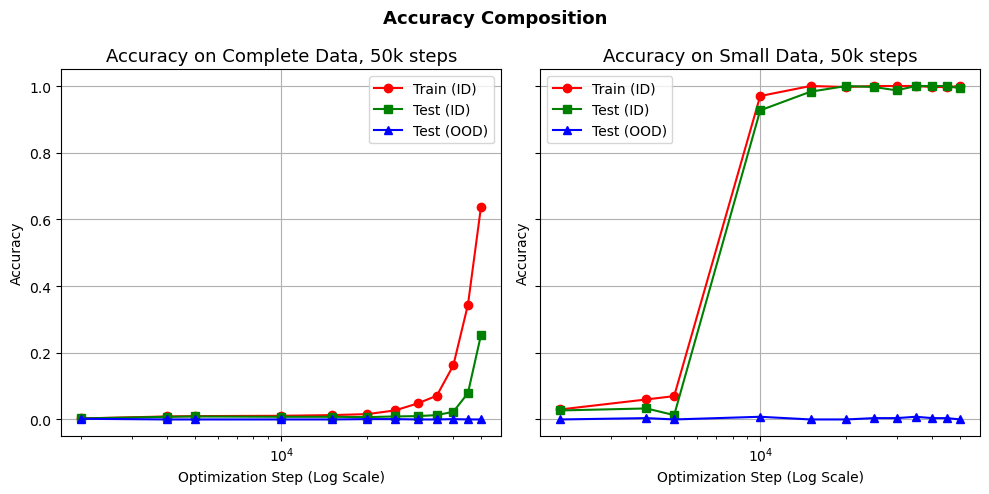

In [140]:
Acc_graph(title_1 = 'Accuracy on Complete Data, 50k steps'  , title_2 = "Accuracy on Small Data, 50k steps")

It could be seen that a bigger dataset just delay the train and test accuracy on later steps. The vocabulary complete =52000 the small is... (check)

## Loss graphs

**Compare the Loss of 2 models**

Insert 2 paths to the csv inside the output files

***Remember** in the csv file this values are printed as default:
>eval_loss 

>train_loss 

as well as the **global_step** and **epoch** needed as time reference


In [141]:
#path_csv_0 = "/home/s220331/GROK/Thesis/outputs_ex_0/training_progress_scores.csv"
path_csv_0 = path_input_0 + "training_progress_scores.csv" 

#path_csv_1= "/scratch/davide/model_paper/outputs_multy/training_progress_scores.csv"
path_csv_1= path_input_1 +"training_progress_scores.csv"

Visually inspect the files if needed usifn pd Dataframe:

In [142]:

data_0 = pd.read_csv(path_csv_0)
data_0
data_1 = pd.read_csv(path_csv_1)
data_1



,global_step,epoch,eval_loss,train_loss
0,724,1,-1.000000,3.702606
1,1448,2,-1.000000,2.491778
2,2000,-1,2.894298,-1.000000
3,2172,3,-1.000000,2.443564
4,2896,4,-1.000000,2.410605
...,...,...,...,...
77,48508,67,-1.000000,0.016747
78,49232,68,-1.000000,0.016701
79,49956,69,-1.000000,0.016096
80,50000,-1,5.187928,-1.000000


In [143]:
def Loss_graph(data_0= data_0, data_1 = data_1):
    # Load the CSV data
    #data = pd.read_csv(path_virt_ex_0)

    # Extract relevant data
    optimization_steps_0 = data_0['global_step'].tolist()
    train_loss_0 = data_0['train_loss'].tolist()
    eval_loss_0 = data_0['eval_loss'].tolist()

    # Create the figure and axis objects
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Loss Composition',fontsize=13, fontweight='bold')


    # First graph: Model loss over optimization steps (Normal)
    axs[0].plot(optimization_steps_0, train_loss_0, 'o-', label='Train Loss', color='r')
    axs[0].plot(optimization_steps_0, eval_loss_0, 's-', label='Eval Loss', color='g')
    axs[0].set_xscale('log')  # Set X-axis to log scale
    axs[0].set_xlabel('Optimization Step (Log Scale)')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].set_title('Model Loss over Optimization Steps (Normal)')

    # Second graph: Model loss over optimization steps (Sharing)
    # Assuming we would have other values if sharing data was different.
    optimization_steps_1 = data_1['global_step'].tolist()
    train_loss_1 = data_1['train_loss'].tolist()
    eval_loss_1 = data_1['eval_loss'].tolist()

    axs[1].plot(optimization_steps_1, train_loss_1, 'o-', label='Train Loss', color='r')
    axs[1].plot(optimization_steps_1, eval_loss_1, 's-', label='Eval Loss', color='g')
    axs[1].set_xscale('log')  # Set X-axis to log scale
    axs[1].set_xlabel('Optimization Step (Log Scale)')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_title('Model Loss over Optimization Steps (Sharing)')

    plt.tight_layout()
    plt.show()

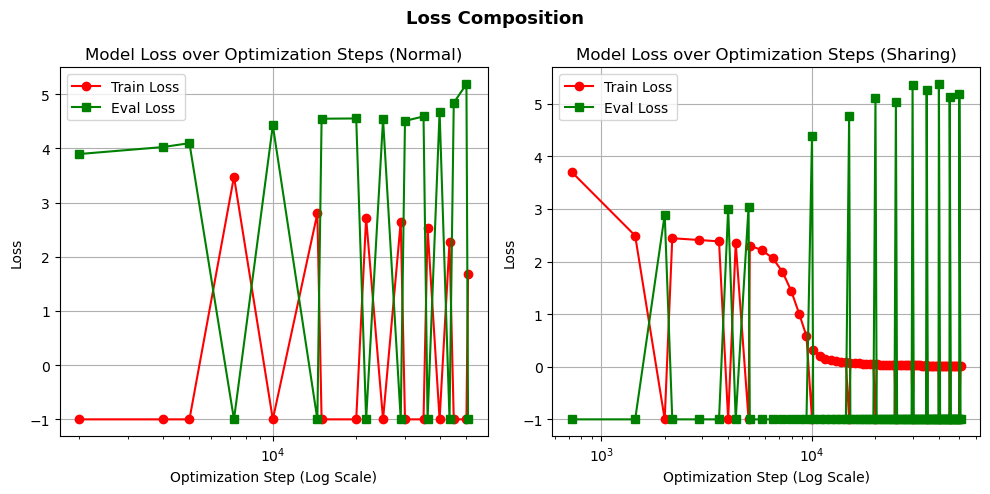

In [144]:
Loss_graph()

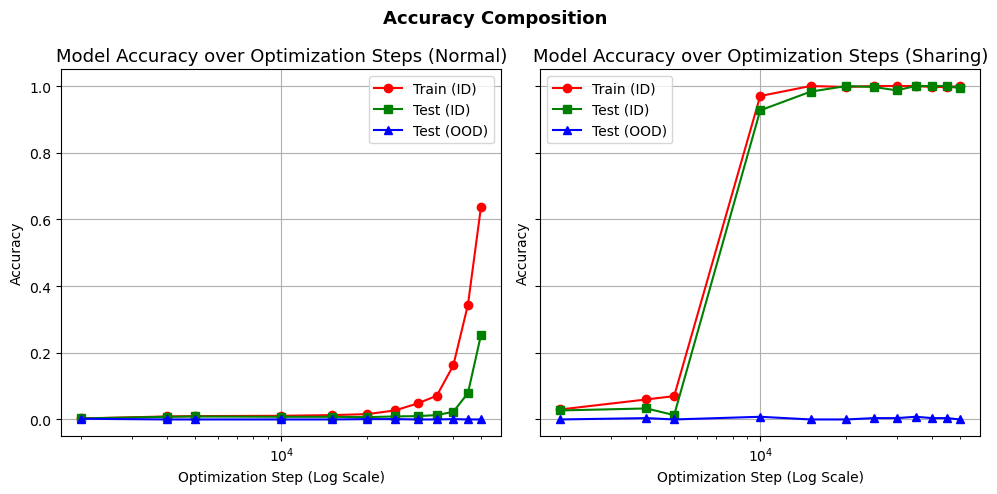

In [145]:
Acc_graph()